In [1]:
from src.pipeline.breast import BreastImageProcessingPipeline
from src.operations.read import read_dicom
from glob import glob

vindr_samples = glob('./vindr_samples/*.dicom')
pipeline = BreastImageProcessingPipeline()
original_images = [read_dicom(dicom_file) for dicom_file in vindr_samples]
processed_images = [pipeline.process(dicom_file) for dicom_file in vindr_samples]

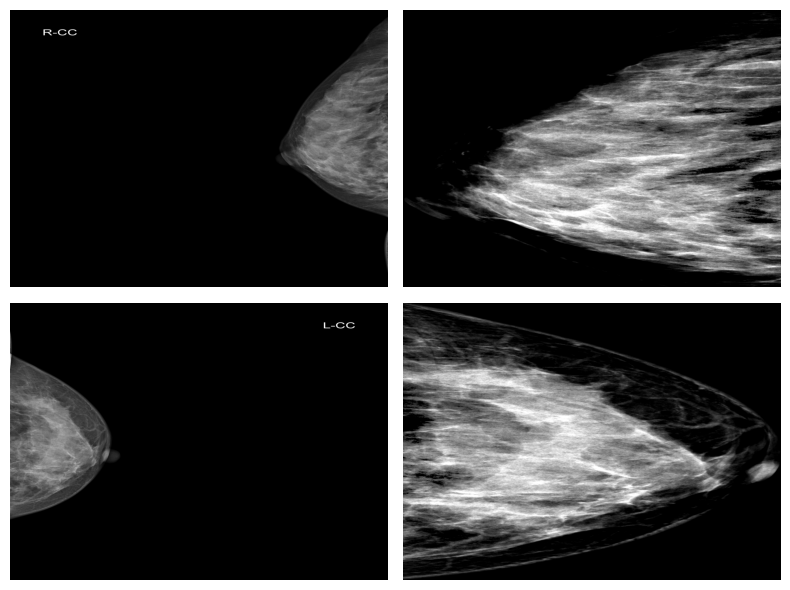

In [7]:
import matplotlib.pyplot as plt

n_samples = len(original_images)
fig, axs = plt.subplots(n_samples, 2, figsize=(8, 6))

for idx, (original, processed) in enumerate(zip(original_images, processed_images)):
    axs[idx][0].imshow(original, cmap='gray', aspect='auto')
    axs[idx][0].axis('off')
    
    axs[idx][1].imshow(processed, cmap='gray', aspect='auto')
    axs[idx][1].axis('off')

plt.tight_layout()
plt.savefig('./figures/processing_results.pdf', format='pdf', dpi=300)
plt.show()